# EDA

In [1]:
# Importing the libraries
import math
import pandas as pd

import numpy as    np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import utils

In [3]:
# Importing the dataset
df, df_avg = utils.load_sensors_data()

In [4]:
display(df.head())
display(df.info())
display(df.describe())

,date,people,co2,hum1,hum2,hum3,hum4,temp1,temp2,temp3,temp4,light1,light2,light3,light4
120,2020-02-21T17:18:30.004Z,0.0,394.0,47.298,46.421,45.705,45.216,30.253,29.796,30.255,30.132,0.0,0.0,0.0,0.0
121,2020-02-21T17:18:00.003Z,0.0,394.0,47.442,46.447,45.711,45.231,30.239,29.828,30.311,30.119,0.0,0.0,0.0,0.0
122,2020-02-21T17:17:30.003Z,0.0,394.0,47.337,46.374,45.776,45.254,30.279,29.828,30.325,30.119,0.0,0.0,0.0,0.0
123,2020-02-21T17:17:00.005Z,0.0,394.0,47.355,46.401,45.820,45.174,30.266,29.828,30.325,30.132,0.0,0.0,0.0,0.0
124,2020-02-21T17:16:30.003Z,0.0,395.0,47.303,46.433,45.829,45.208,30.295,29.841,30.282,30.132,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8754 entries, 120 to 10038
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8754 non-null   object 
 1   people  8754 non-null   float64
 2   co2     8754 non-null   float64
 3   hum1    8754 non-null   float64
 4   hum2    8754 non-null   float64
 5   hum3    8754 non-null   float64
 6   hum4    8754 non-null   float64
 7   temp1   8754 non-null   float64
 8   temp2   8754 non-null   float64
 9   temp3   8754 non-null   float64
 10  temp4   8754 non-null   float64
 11  light1  8754 non-null   float64
 12  light2  8754 non-null   float64
 13  light3  8754 non-null   float64
 14  light4  8754 non-null   float64
dtypes: float64(14), object(1)
memory usage: 1.1+ MB


None

,people,co2,hum1,hum2,hum3,hum4,temp1,temp2,temp3,temp4,light1,light2,light3,light4
count,8754.00000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000,8754.000000
mean,3.83162,873.106466,53.243193,51.232095,51.031958,50.701003,26.446305,26.629122,26.875063,26.720785,95.406492,124.940505,165.148322,119.215555
std,3.51283,306.768297,7.450894,6.926702,6.917546,7.193598,1.445337,1.273223,1.412050,1.366279,86.341597,104.589789,89.687703,108.081559
min,0.00000,330.000000,39.294000,39.173000,38.227000,37.925000,20.912000,21.873000,22.888000,22.682000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,639.000000,46.464000,44.526750,45.885000,43.778000,25.489000,26.060000,25.809000,26.063000,0.000000,7.658000,180.631000,5.172000
50%,3.00000,828.500000,54.218000,51.849500,50.654000,51.057000,26.421000,26.442000,26.642000,26.491500,87.265000,156.452000,204.726000,141.760000
75%,6.00000,1123.000000,59.443000,56.770000,56.219250,56.361000,27.110000,27.075000,27.967000,27.358000,192.654000,185.945000,223.797000,184.862000
max,16.00000,1734.000000,69.213000,71.318000,72.110000,70.338000,30.423000,30.955000,30.677000,31.345000,215.285000,451.961000,258.434000,399.123000


In [5]:
display(df_avg.head())
display(df_avg.info())
display(df_avg.describe())

,people,co2,hum_avg,temp_avg,light_avg
120,0.0,394.0,46.16000,30.10900,0.0
121,0.0,394.0,46.20775,30.12425,0.0
122,0.0,394.0,46.18525,30.13775,0.0
123,0.0,394.0,46.18750,30.13775,0.0
124,0.0,395.0,46.19325,30.13750,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8754 entries, 120 to 10038
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   people     8754 non-null   float64
 1   co2        8754 non-null   float64
 2   hum_avg    8754 non-null   float64
 3   temp_avg   8754 non-null   float64
 4   light_avg  8754 non-null   float64
dtypes: float64(5)
memory usage: 410.3 KB


None

,people,co2,hum_avg,temp_avg,light_avg
count,8754.00000,8754.000000,8754.000000,8754.000000,8754.000000
mean,3.83162,873.106466,51.552062,26.667819,126.177719
std,3.51283,306.768297,6.746536,1.110084,80.615172
min,0.00000,330.000000,39.573000,23.557250,0.000000
25%,1.00000,639.000000,44.851312,26.155000,56.008312
50%,3.00000,828.500000,52.475500,26.454000,178.615125
75%,6.00000,1123.000000,56.796125,26.755063,193.335500
max,16.00000,1734.000000,67.945750,30.835750,242.768500


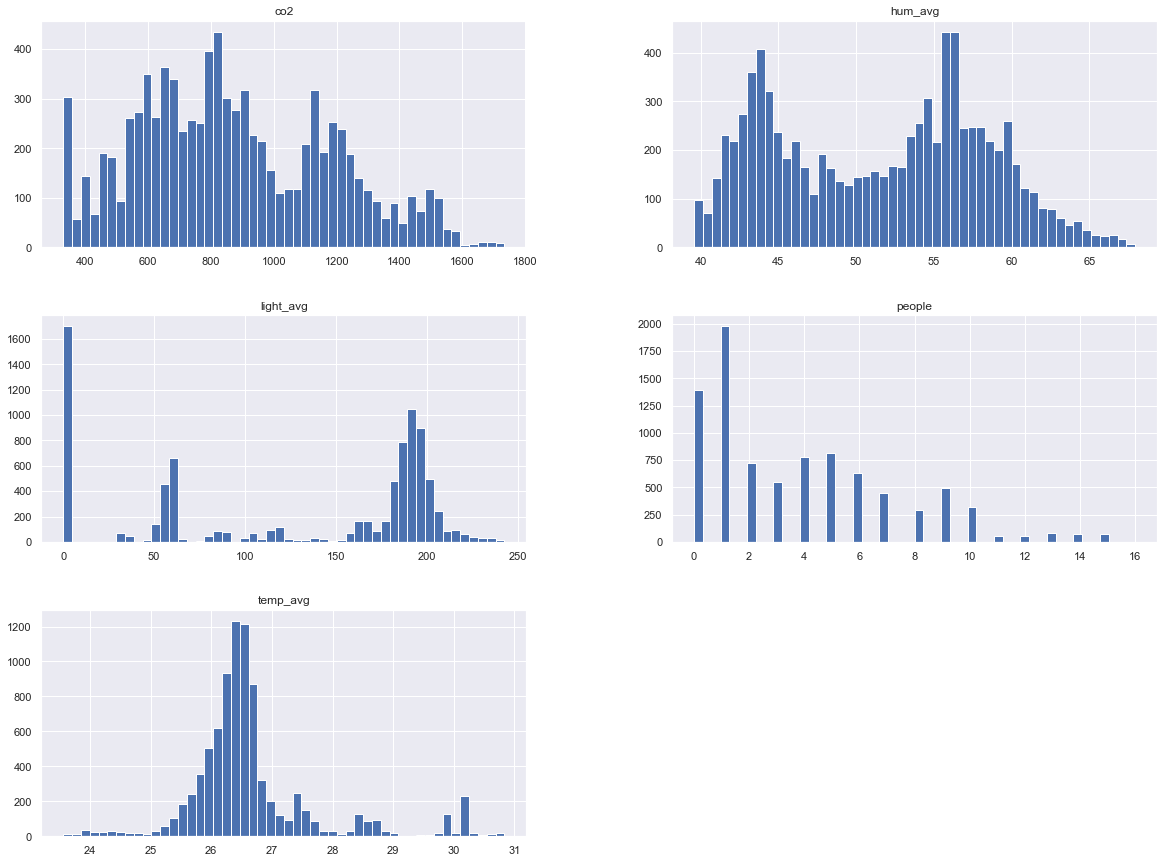

In [6]:
df_avg.hist(bins=50, figsize=(20,15))
plt.show()

Saving figure corr_full


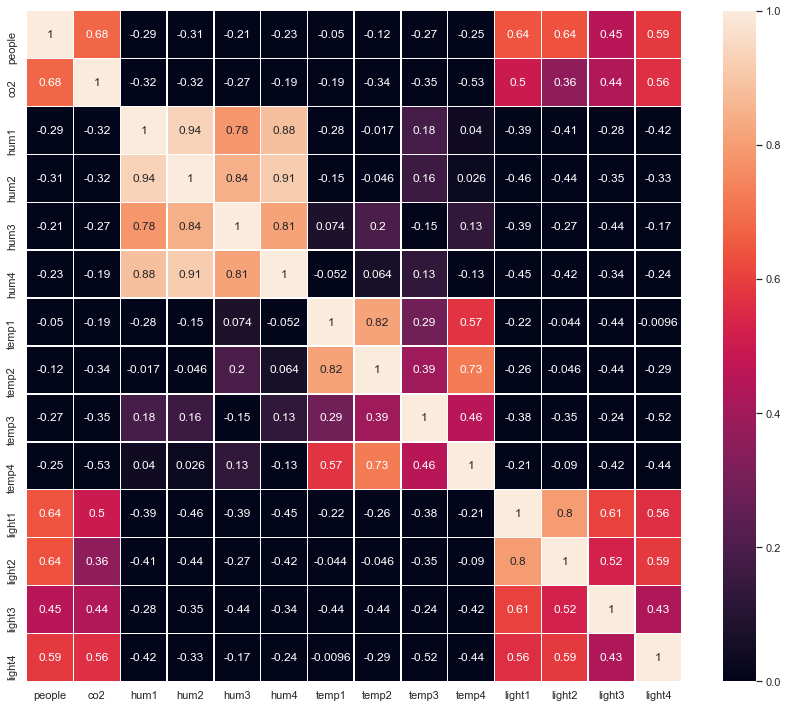

Saving figure corr


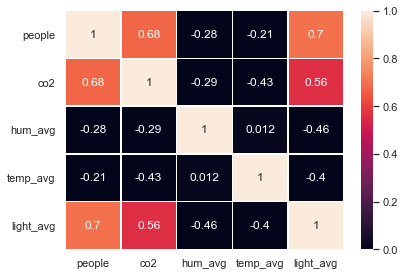

people       1.000000
light_avg    0.702294
co2          0.678713
temp_avg    -0.214993
hum_avg     -0.275662
Name: people, dtype: float64

In [7]:
plt.figure(figsize=(12, 10))
sns_plot = sns.heatmap(df.corr(), vmin=0, vmax=1, linewidths=.5, annot=True)
utils.save_fig('corr_full')
plt.show()

sns_plot = sns.heatmap(df_avg.corr(), vmin=0, vmax=1,
                       linewidths=.5, annot=True)
utils.save_fig('corr')
plt.show()

df_avg.corr()['people'].sort_values(ascending=False)

Saving figure scatter_matrix


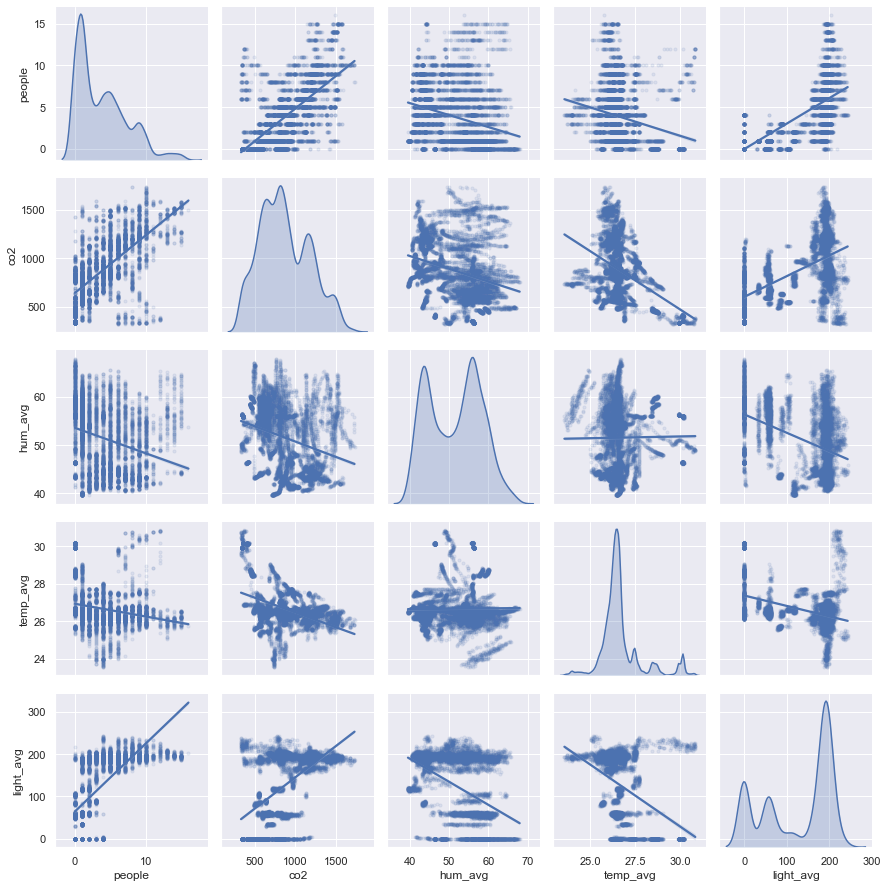

In [8]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# scatter_matrix(df_avg, hist_kwds={'bins': 20}, figsize=(15, 10))
# utils.save_fig('scatter_matrix')
# plt.show()

sns.pairplot(df_avg, kind='reg', diag_kind="kde",
             plot_kws=dict(scatter_kws=dict(alpha=0.1, s=10)))
utils.save_fig('scatter_matrix')
plt.show()

## PCA

In [9]:
from sklearn.model_selection import train_test_split

X = df_avg.iloc[:, 1:]
y = df_avg.iloc[:, 0]

In [10]:
# Reduce dimension
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print('Features :', list(X.columns))
print('PC explained variance ratio :', list(pca.explained_variance_ratio_))
print('Optimum dimension :', d)

Features : ['co2', 'hum_avg', 'temp_avg', 'light_avg']
PC explained variance ratio : [0.9563880045286566, 0.043246408161425845, 0.0003566436274628317, 8.94368245468037e-06]
Optimum dimension : 1


Saving figure people_vs_reduced


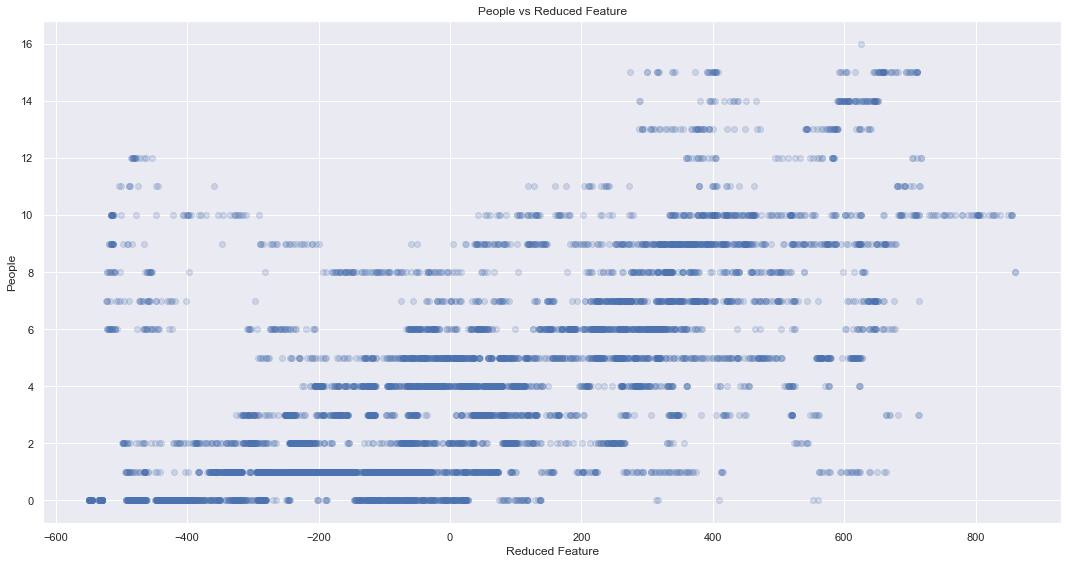

Saving figure people_vs_co2


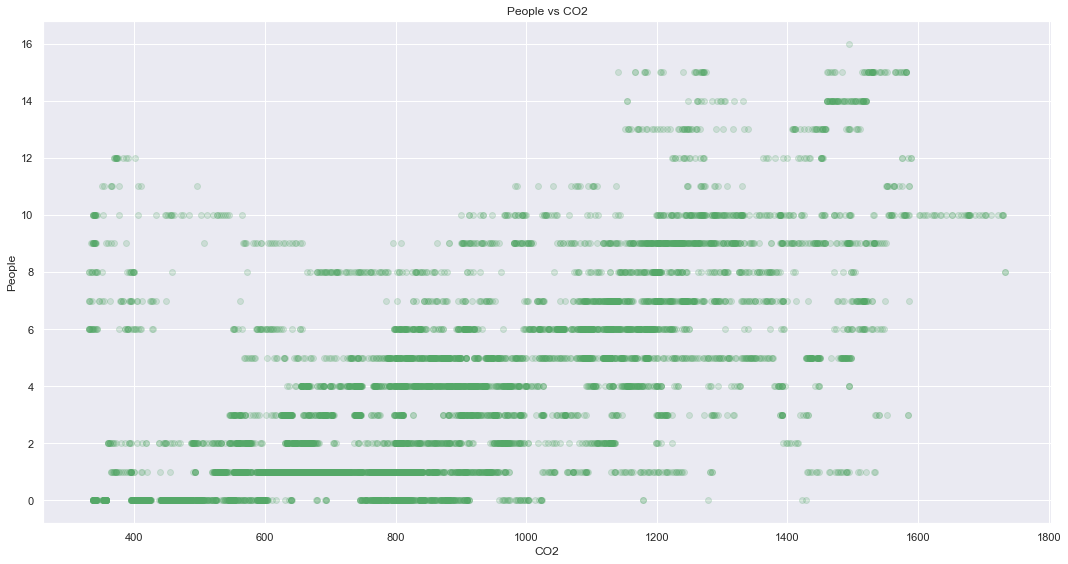

In [11]:
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(15, 8))
plt.title('People vs Reduced Feature')
plt.ylabel('People')
plt.xlabel('Reduced Feature')
plt.scatter(X_reduced, y, alpha=0.2)
utils.save_fig('people_vs_reduced')
plt.show()

plt.figure(figsize=(15, 8))
plt.title('People vs CO2')
plt.ylabel('People')
plt.xlabel('CO2')
plt.scatter(df_avg['co2'], df_avg['people'], alpha=0.2, color='g')
# plt.scatter(X_reduced, y, alpha=0.2, color='b')
utils.save_fig('people_vs_co2')
plt.show()

Saving figure people_vs_reduced_compare


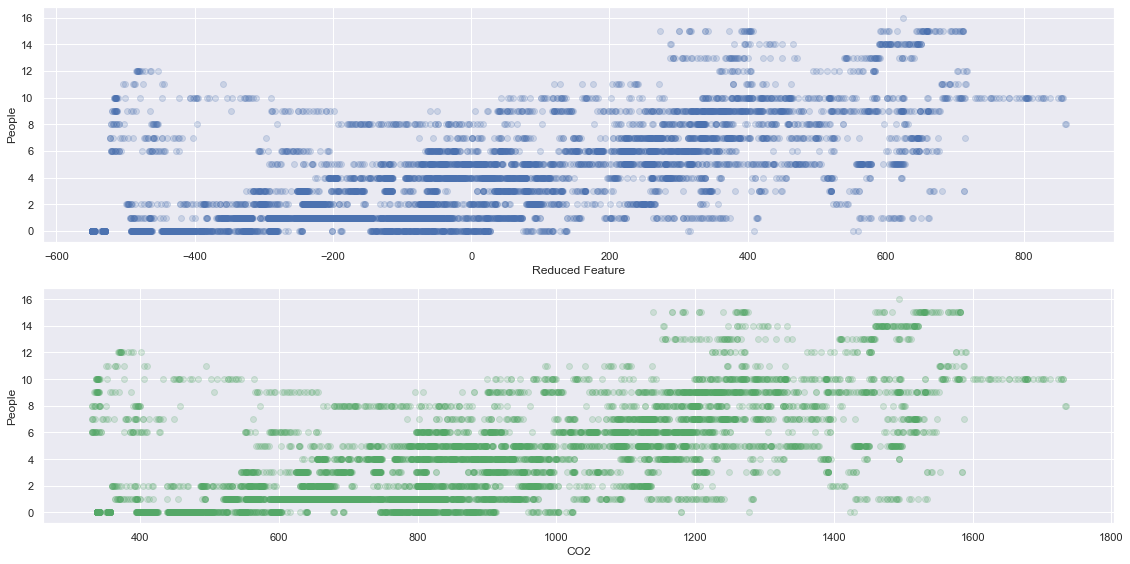

In [12]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.ylabel('People')
plt.xlabel('Reduced Feature')
plt.scatter(X_reduced, y, alpha=0.2)

plt.subplot(2, 1, 2)
plt.ylabel('People')
plt.xlabel('CO2')
plt.scatter(df_avg['co2'], df_avg['people'], alpha=0.2, color='g')
# plt.scatter(X_reduced, y, alpha=0.2, color='b')

utils.save_fig('people_vs_reduced_compare')
plt.show()

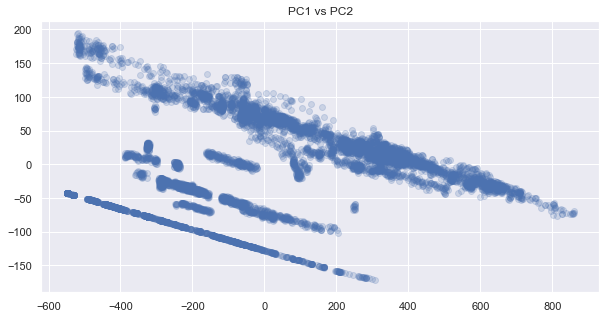

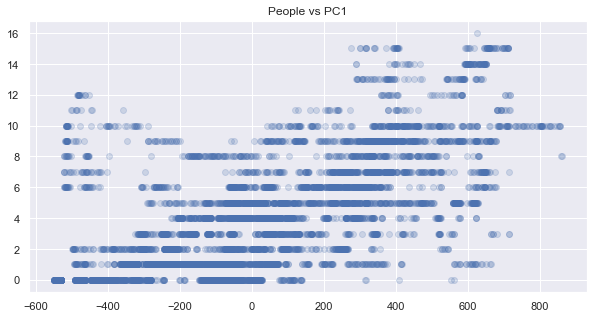

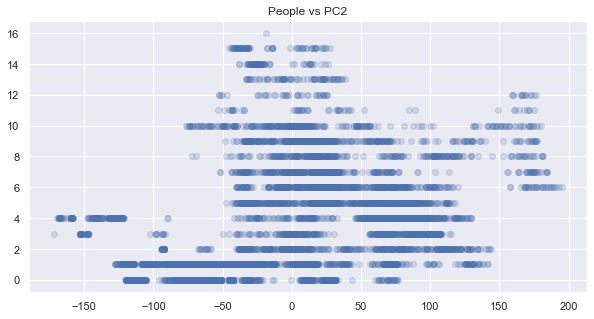

In [13]:
X_reduced2 = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10, 5))
plt.title('PC1 vs PC2')
plt.scatter(X_reduced2.T[0], X_reduced2.T[1], alpha=0.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('People vs PC1')
plt.scatter(X_reduced2.T[0], y, alpha=0.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('People vs PC2')
plt.scatter(X_reduced2.T[1], y, alpha=0.2)
plt.show()

## Linear Model

In [14]:
from sklearn.model_selection import train_test_split

RSEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=RSEED)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [15]:
import matplotlib
from sklearn.metrics import mean_squared_error

# coef must be pandas series
def plot_reg_coef(name, coef, figsize=(8.0, 4.0), save_fig=False):
    imp_coef = coef.sort_values()

    matplotlib.rcParams['figure.figsize'] = figsize
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance ({})".format(name))
    if save_fig is not False:
        utils.save_fig('feat_importance_{}'.format(name))
    plt.show()
    
def inspect_linear_model(reg, X_train, X_test, y_train, y_test, save_fig=False):
    model_name = reg.__class__.__name__

    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %
          reg.score(X_train, y_train))
    print("Best score using built-in LassoCV (test): %f" %
          reg.score(X_test, y_test))
    coef = pd.Series(reg.coef_, index=X_train.columns)

    print(model_name + " picked " + str(sum(coef != 0)) +
          " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

    plot_reg_coef(model_name, coef, save_fig=save_fig)


### Lasso Regression

Best alpha using built-in LassoCV: 0.729955
Best score using built-in LassoCV: 0.615142
Best score using built-in LassoCV (test): 0.610793
LassoCV picked 3 variables and eliminated the other 1 variables
Saving figure feat_importance_LassoCV


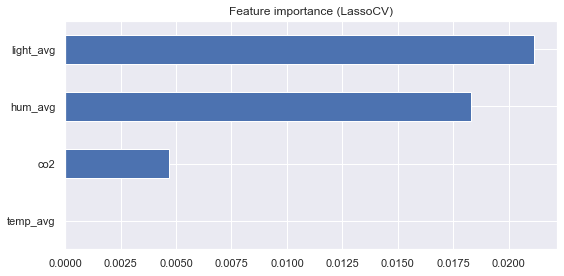

Training RMSE : 2.1730132269152427
Training MAE : 1.6063261242167763
Training Explained Variance : 0.6151421737963332
Testing RMSE : 2.2151830010943354
Testing MAE : 1.633307214428321
Testing Explained Variance : 0.6110565517660995
Saving figure LassoCV_pred_actual_instance_train


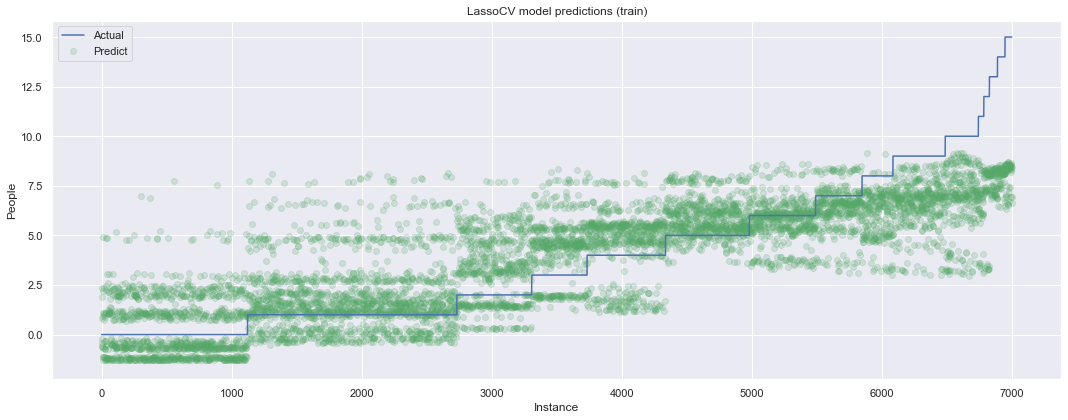

Saving figure LassoCV_pred_actual_instance_test


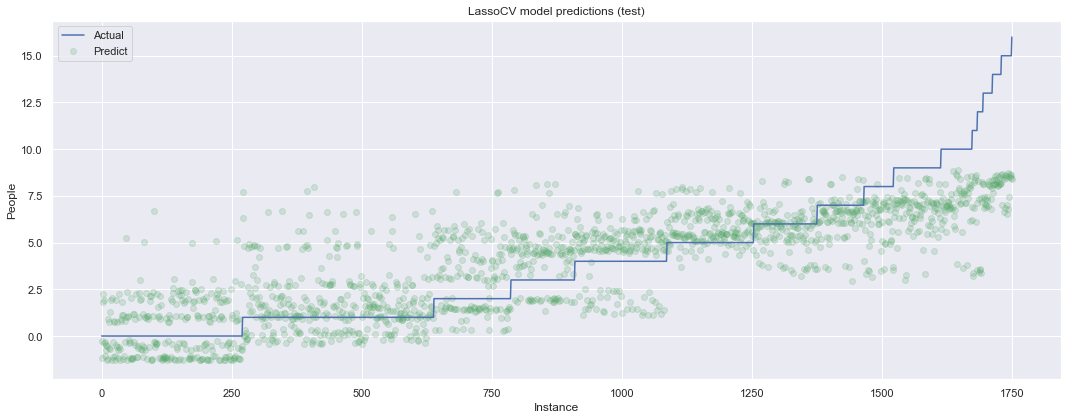

Saving figure LassoCV_pred_actual_reduced_train


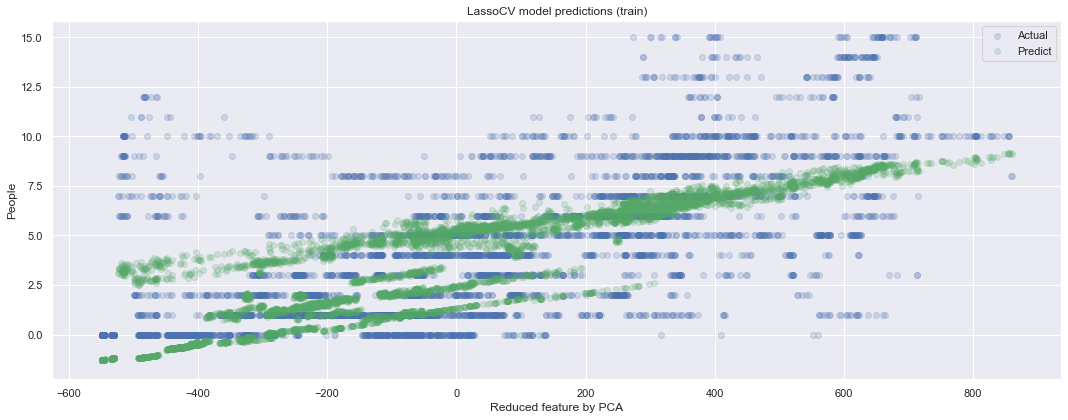

Saving figure LassoCV_pred_actual_reduced_test


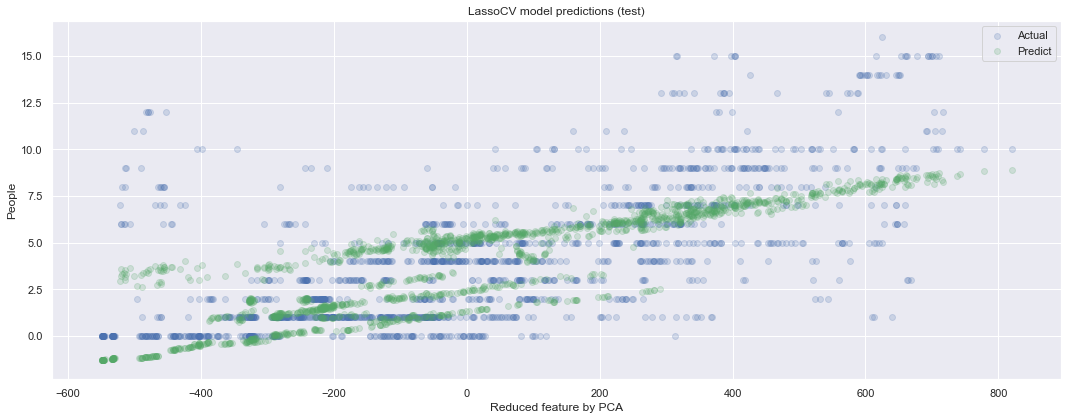

In [16]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

lasso_reg = LassoCV()
lasso_reg.fit(X_train, y_train)

inspect_linear_model(lasso_reg, X_train, X_test, y_train, y_test, save_fig=True)
utils.plot_prediction_wtih_pca(lasso_reg, pca, X_train, X_test, y_train, y_test)

### Ridge Regression

Best alpha using built-in LassoCV: 1.000000
Best score using built-in LassoCV: 0.655447
Best score using built-in LassoCV (test): 0.650161
RidgeCV picked 4 variables and eliminated the other 0 variables
Saving figure feat_importance_RidgeCV


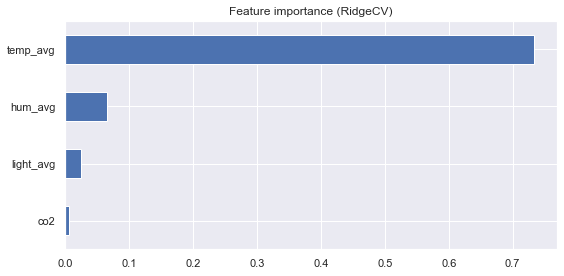

Training RMSE : 2.0560812324618842
Training MAE : 1.5119267132650782
Training Explained Variance : 0.6554469325135481
Testing RMSE : 2.100163160408761
Testing MAE : 1.5449829125951327
Testing Explained Variance : 0.6504705048837017
Saving figure RidgeCV_pred_actual_instance_train


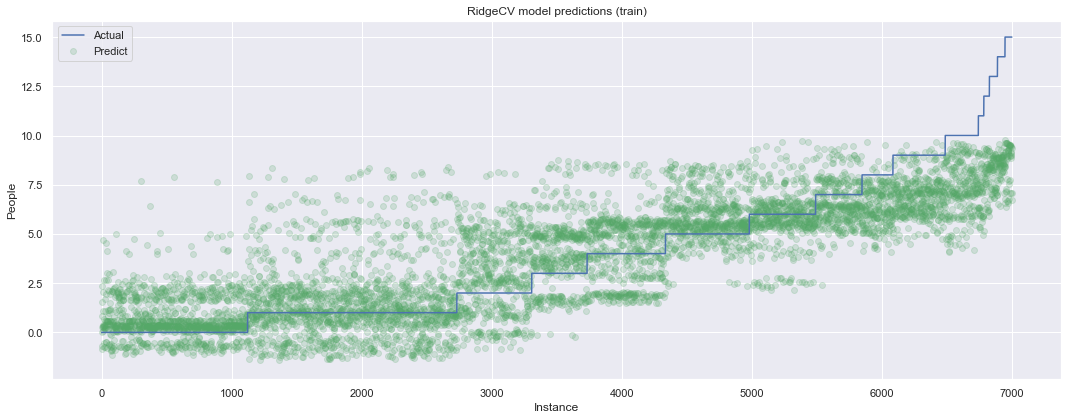

Saving figure RidgeCV_pred_actual_instance_test


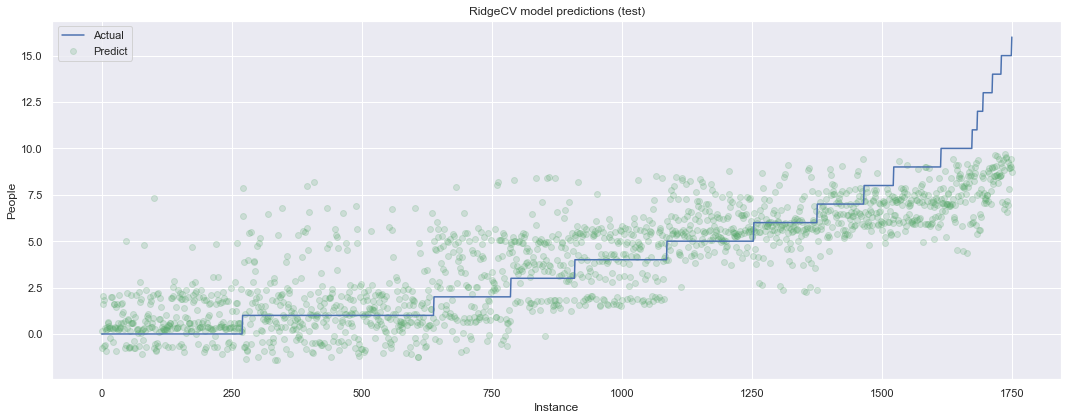

Saving figure RidgeCV_pred_actual_reduced_train


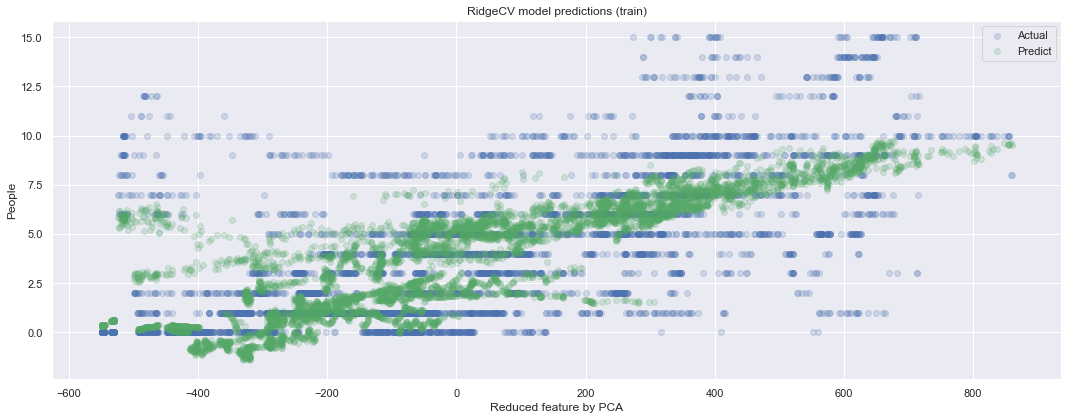

Saving figure RidgeCV_pred_actual_reduced_test


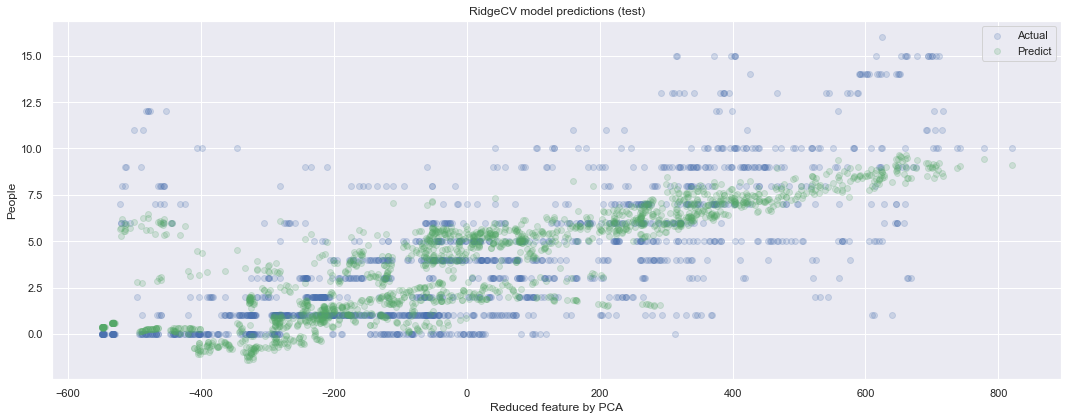

In [17]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error


ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)

inspect_linear_model(ridge_reg, X_train, X_test, y_train, y_test, save_fig=True)
utils.plot_prediction_wtih_pca(ridge_reg, pca, X_train, X_test, y_train, y_test)

In [18]:
ridge_reg.intercept_, ridge_reg.coef_

(-27.172607771205847, array([0.0055328 , 0.06602593, 0.73316482, 0.02540331]))

### Polynomial Ridge Regression

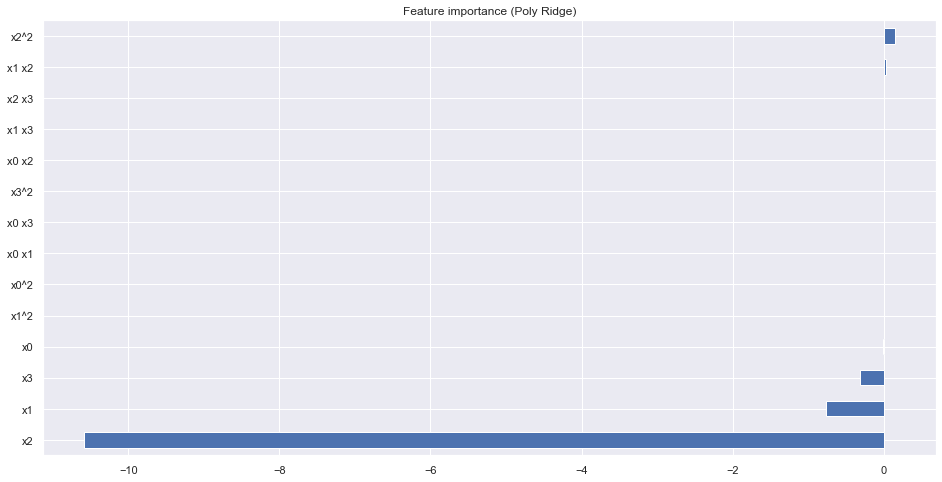

Training RMSE : 44.162174867064486
Training MAE : 35.90270469171517
Training Explained Variance : -157.95584020036773
Testing RMSE : 43.699256015382396
Testing MAE : 35.39725098368735
Testing Explained Variance : -150.41976218841205


In [19]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_ridge_reg = RidgeCV()
poly_ridge_reg.fit(X_train_poly, y_train)

coef = pd.Series(poly_ridge_reg.coef_, index=poly.get_feature_names())
plot_reg_coef('Poly Ridge', coef, figsize=(16,8))

poly_pca = PCA(n_components=1)
poly_pca.fit(X_train_poly)
X_train_reduced = poly_pca.transform(X_train_poly)
X_test_reduced = poly_pca.transform(X_test_poly)

y_train_pred = poly_ridge_reg.predict(X_train_poly)
y_test_pred = poly_ridge_reg.predict(X_test_poly)

utils.val_metrics(y_train, y_train_pred, prefix='Training')
utils.val_metrics(y_test, y_test_pred)

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [21]:
# Short Decision Tree

dt_reg = DecisionTreeRegressor(max_depth=3, random_state=RSEED)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [22]:
y_pred = dt_reg.predict(X_test)
utils.val_metrics(y_test, y_pred)

Testing RMSE : 1.9087547970927232
Testing MAE : 1.2799222760364402
Testing Explained Variance : 0.7110881458011837


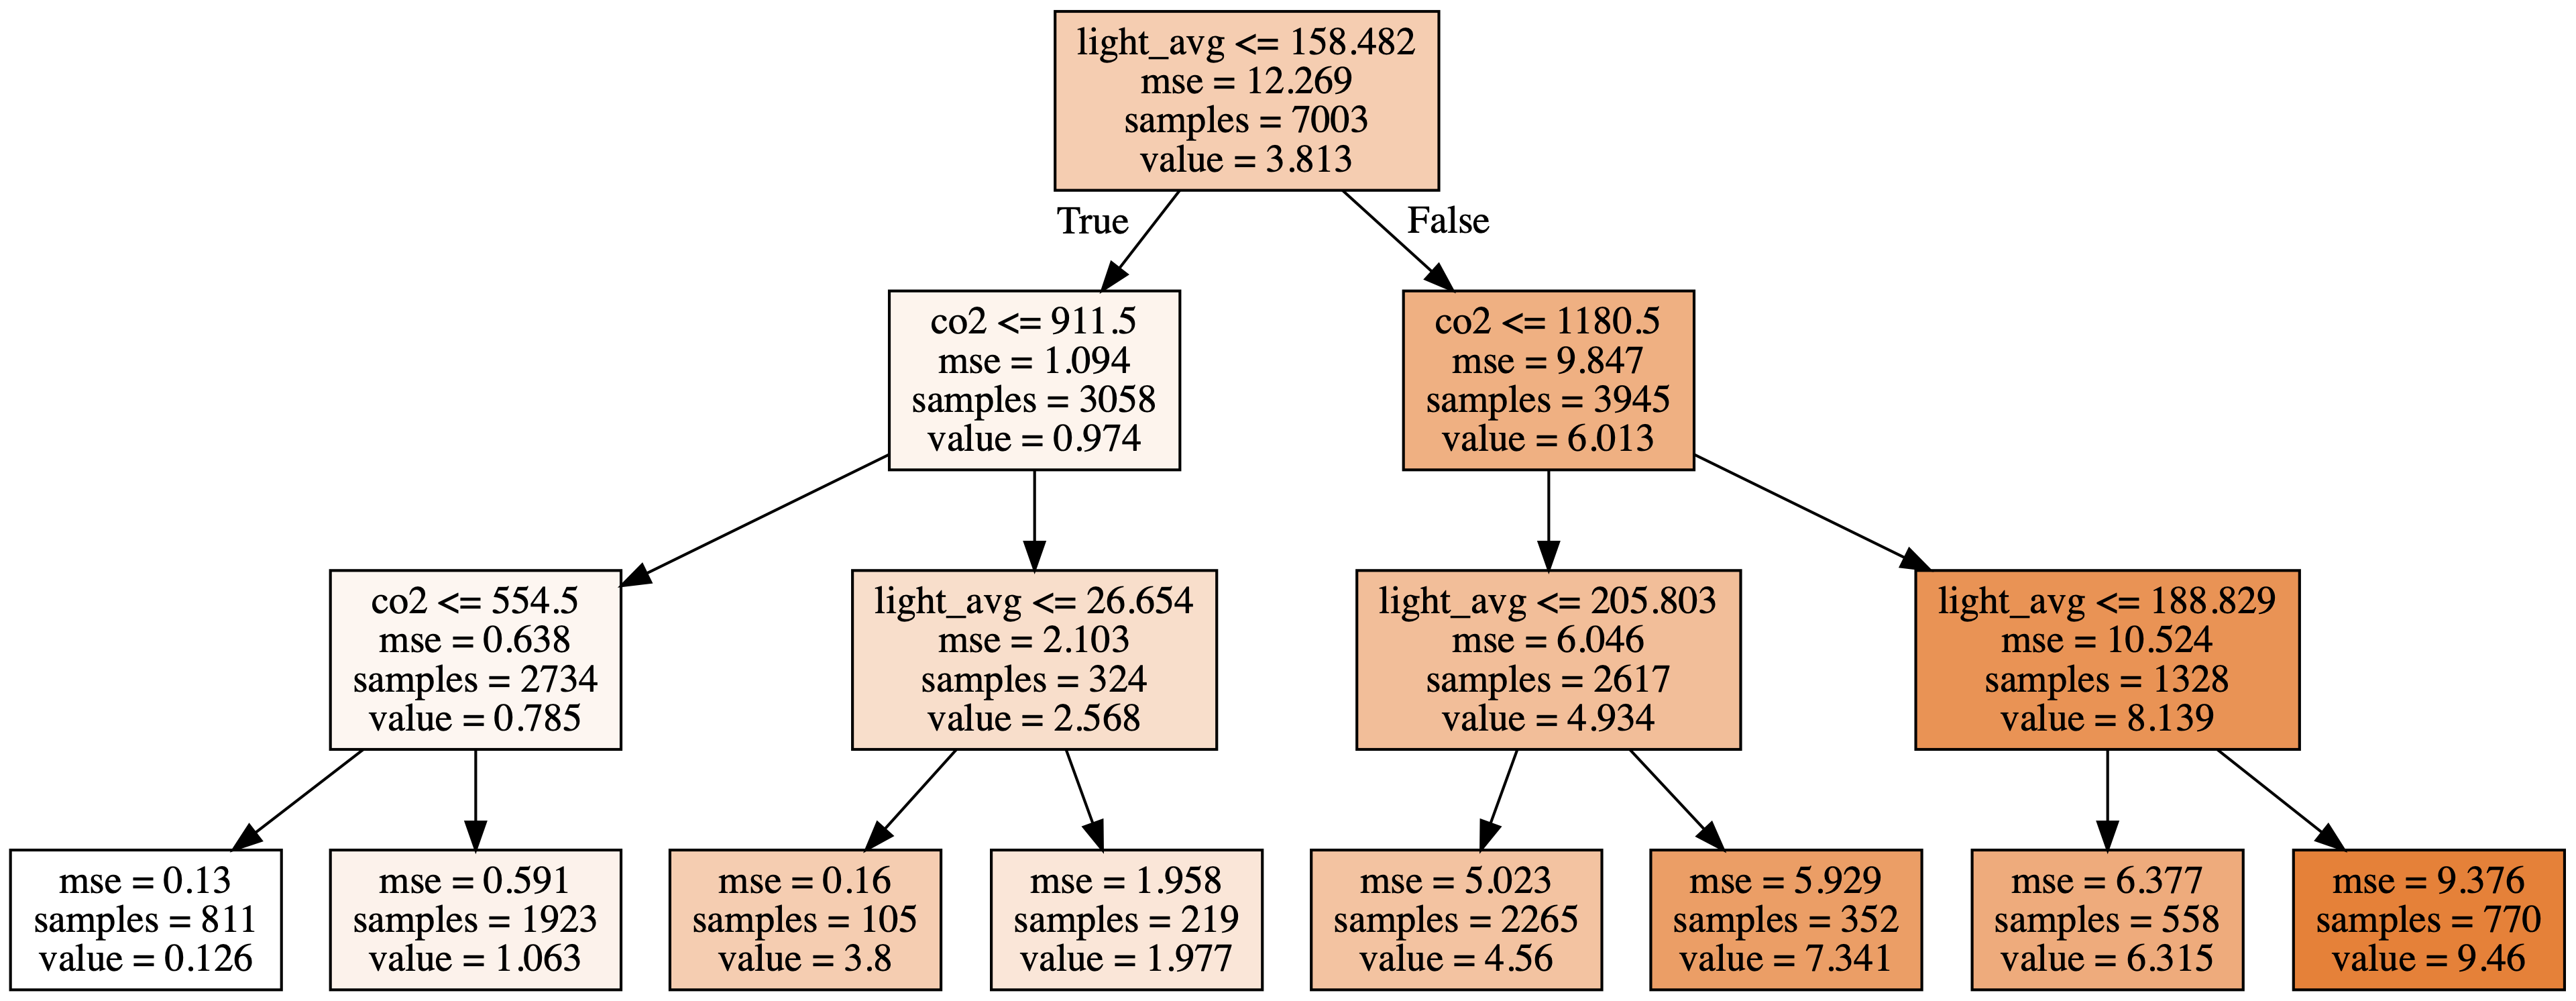

In [23]:
tree.export_graphviz(dt_reg,
                     out_file="images/tree_short.dot",
                     feature_names=X_train.columns,
                     filled=True)
!dot -Tpng -Gdpi=300 'images/tree_short.dot' -o 'images/tree_short.png'

from IPython.display import Image
Image(filename='images/tree_short.png') 

In [24]:
dt_reg = DecisionTreeRegressor(max_depth=None, random_state=RSEED)
dt_reg.fit(X_train, y_train)

display(dt_reg)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [25]:
print(dt_reg.tree_.node_count)
print(dt_reg.tree_.max_depth)
print(dt_reg.tree_.n_leaves)

2633
25
1317
